In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [43]:
# load data 
df = pd.read_parquet('processed_data.parquet')

In [44]:
#pd max columnn
pd.set_option('display.max_columns', None)
df.head()

,sex_ind,posted_speed_limit_ind,num_units_ind,crash_hour_ind,crash_day_of_week_ind,crash_month_ind,intersection_related_i_ind,hit_and_run_i_ind,dooring_i_ind,person_type_ind_BICYCLE,person_type_ind_PEDESTRIAN,pedpedal_action_ind_0,pedpedal_action_ind_AGAINST TRAFFIC,pedpedal_action_ind_CROSSING - AGAINST SIGNAL,pedpedal_action_ind_CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION),pedpedal_action_ind_CROSSING - NO CONTROLS (AT INTERSECTION),pedpedal_action_ind_CROSSING - NO CONTROLS (NOT AT INTERSECTION),pedpedal_action_ind_CROSSING - WITH SIGNAL,pedpedal_action_ind_ENTER FROM DRIVE/ALLEY,pedpedal_action_ind_INTOXICATED PED/PEDAL,pedpedal_action_ind_NO ACTION,pedpedal_action_ind_NOT AT INTERSECTION,pedpedal_action_ind_OTHER ACTION,pedpedal_action_ind_PARKED VEHICLE,pedpedal_action_ind_PLAYING IN ROADWAY,pedpedal_action_ind_PLAYING/WORKING ON VEHICLE,pedpedal_action_ind_SCHOOL BUS (WITHIN 50 FT.),pedpedal_action_ind_STANDING IN ROADWAY,pedpedal_action_ind_TO/FROM DISABLED VEHICLE,pedpedal_action_ind_TURNING LEFT,pedpedal_action_ind_TURNING RIGHT,pedpedal_action_ind_UNKNOWN/NA,pedpedal_action_ind_WAITING FOR SCHOOL BUS,pedpedal_action_ind_WITH TRAFFIC,pedpedal_action_ind_WORKING IN ROADWAY,pedpedal_visibility_ind_0,pedpedal_visibility_ind_CONTRASTING CLOTHING,pedpedal_visibility_ind_NO CONTRASTING CLOTHING,pedpedal_visibility_ind_OTHER LIGHT SOURCE USED,pedpedal_visibility_ind_REFLECTIVE MATERIAL,pedpedal_location_ind_0,pedpedal_location_ind_BIKE LANE,pedpedal_location_ind_BIKEWAY,pedpedal_location_ind_DRIVEWAY ACCESS,pedpedal_location_ind_IN CROSSWALK,pedpedal_location_ind_IN ROADWAY,pedpedal_location_ind_NOT IN ROADWAY,pedpedal_location_ind_SHOULDER,pedpedal_location_ind_UNKNOWN/NA,vehicle_type_ind_0,vehicle_type_ind_3-WHEELED MOTORCYCLE (2 REAR WHEELS),vehicle_type_ind_ALL-TERRAIN VEHICLE (ATV),vehicle_type_ind_AUTOCYCLE,vehicle_type_ind_BUS OVER 15 PASS.,vehicle_type_ind_BUS UP TO 15 PASS.,vehicle_type_ind_FARM EQUIPMENT,vehicle_type_ind_MOPED OR MOTORIZED BICYCLE,vehicle_type_ind_MOTORCYCLE (OVER 150CC),vehicle_type_ind_OTHER,vehicle_type_ind_OTHER VEHICLE WITH TRAILER,vehicle_type_ind_PASSENGER,vehicle_type_ind_PICKUP,vehicle_type_ind_RECREATIONAL OFF-HIGHWAY VEHICLE (ROV),vehicle_type_ind_SINGLE UNIT TRUCK WITH TRAILER,vehicle_type_ind_SPORT UTILITY VEHICLE (SUV),vehicle_type_ind_TRACTOR W/ SEMI-TRAILER,vehicle_type_ind_TRACTOR W/O SEMI-TRAILER,vehicle_type_ind_TRUCK - SINGLE UNIT,vehicle_type_ind_UNKNOWN/NA,vehicle_type_ind_VAN/MINI-VAN,traffic_control_device_ind_BICYCLE CROSSING SIGN,traffic_control_device_ind_DELINEATORS,traffic_control_device_ind_FLASHING CONTROL SIGNAL,traffic_control_device_ind_LANE USE MARKING,traffic_control_device_ind_NO CONTROLS,traffic_control_device_ind_NO PASSING,traffic_control_device_ind_OTHER,traffic_control_device_ind_OTHER RAILROAD CROSSING,traffic_control_device_ind_OTHER REG. SIGN,traffic_control_device_ind_OTHER WARNING SIGN,traffic_control_device_ind_PEDESTRIAN CROSSING SIGN,traffic_control_device_ind_POLICE/FLAGMAN,traffic_control_device_ind_RAILROAD CROSSING GATE,traffic_control_device_ind_RR CROSSING SIGN,traffic_control_device_ind_SCHOOL ZONE,traffic_control_device_ind_STOP SIGN/FLASHER,traffic_control_device_ind_TRAFFIC SIGNAL,traffic_control_device_ind_UNKNOWN,traffic_control_device_ind_YIELD,weather_condition_ind_BLOWING SNOW,weather_condition_ind_CLEAR,weather_condition_ind_CLOUDY/OVERCAST,weather_condition_ind_FOG/SMOKE/HAZE,weather_condition_ind_FREEZING RAIN/DRIZZLE,weather_condition_ind_OTHER,weather_condition_ind_RAIN,weather_condition_ind_SEVERE CROSS WIND GATE,weather_condition_ind_SLEET/HAIL,weather_condition_ind_SNOW,weather_condition_ind_UNKNOWN,lighting_condition_ind_DARKNESS,"lighting_condition_ind_DARKNESS, LIGHTED ROAD",lighting_condition_ind_DAWN,lighting_condition_ind_DAYLIGHT,lighting_condition_ind_DUSK,lighting_condition_ind_UNKNOWN,first_crash_type_ind_ANGLE,first_crash_type_ind_ANIMAL,first_crash_type_ind_FIXED OBJECT,first_crash_type_ind_HEAD ON,first_cras

In [46]:
#show all fields that contain "tow"
df.filter(like='crash_type').head()

#drop fields crash_type_ind_INJURY AND / OR TOW DUE TO CRASH	crash_type_ind_NO INJURY / DRIVE AWAY
df = df.drop(['crash_type_ind_INJURY AND / OR TOW DUE TO CRASH', 'crash_type_ind_NO INJURY / DRIVE AWAY'], axis=1)

In [47]:
#remove street name
df = df.drop(columns=['street_name'])
#remove crash type

In [48]:
df.head()

,sex_ind,posted_speed_limit_ind,num_units_ind,crash_hour_ind,crash_day_of_week_ind,crash_month_ind,intersection_related_i_ind,hit_and_run_i_ind,dooring_i_ind,person_type_ind_BICYCLE,person_type_ind_PEDESTRIAN,pedpedal_action_ind_0,pedpedal_action_ind_AGAINST TRAFFIC,pedpedal_action_ind_CROSSING - AGAINST SIGNAL,pedpedal_action_ind_CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION),pedpedal_action_ind_CROSSING - NO CONTROLS (AT INTERSECTION),pedpedal_action_ind_CROSSING - NO CONTROLS (NOT AT INTERSECTION),pedpedal_action_ind_CROSSING - WITH SIGNAL,pedpedal_action_ind_ENTER FROM DRIVE/ALLEY,pedpedal_action_ind_INTOXICATED PED/PEDAL,pedpedal_action_ind_NO ACTION,pedpedal_action_ind_NOT AT INTERSECTION,pedpedal_action_ind_OTHER ACTION,pedpedal_action_ind_PARKED VEHICLE,pedpedal_action_ind_PLAYING IN ROADWAY,pedpedal_action_ind_PLAYING/WORKING ON VEHICLE,pedpedal_action_ind_SCHOOL BUS (WITHIN 50 FT.),pedpedal_action_ind_STANDING IN ROADWAY,pedpedal_action_ind_TO/FROM DISABLED VEHICLE,pedpedal_action_ind_TURNING LEFT,pedpedal_action_ind_TURNING RIGHT,pedpedal_action_ind_UNKNOWN/NA,pedpedal_action_ind_WAITING FOR SCHOOL BUS,pedpedal_action_ind_WITH TRAFFIC,pedpedal_action_ind_WORKING IN ROADWAY,pedpedal_visibility_ind_0,pedpedal_visibility_ind_CONTRASTING CLOTHING,pedpedal_visibility_ind_NO CONTRASTING CLOTHING,pedpedal_visibility_ind_OTHER LIGHT SOURCE USED,pedpedal_visibility_ind_REFLECTIVE MATERIAL,pedpedal_location_ind_0,pedpedal_location_ind_BIKE LANE,pedpedal_location_ind_BIKEWAY,pedpedal_location_ind_DRIVEWAY ACCESS,pedpedal_location_ind_IN CROSSWALK,pedpedal_location_ind_IN ROADWAY,pedpedal_location_ind_NOT IN ROADWAY,pedpedal_location_ind_SHOULDER,pedpedal_location_ind_UNKNOWN/NA,vehicle_type_ind_0,vehicle_type_ind_3-WHEELED MOTORCYCLE (2 REAR WHEELS),vehicle_type_ind_ALL-TERRAIN VEHICLE (ATV),vehicle_type_ind_AUTOCYCLE,vehicle_type_ind_BUS OVER 15 PASS.,vehicle_type_ind_BUS UP TO 15 PASS.,vehicle_type_ind_FARM EQUIPMENT,vehicle_type_ind_MOPED OR MOTORIZED BICYCLE,vehicle_type_ind_MOTORCYCLE (OVER 150CC),vehicle_type_ind_OTHER,vehicle_type_ind_OTHER VEHICLE WITH TRAILER,vehicle_type_ind_PASSENGER,vehicle_type_ind_PICKUP,vehicle_type_ind_RECREATIONAL OFF-HIGHWAY VEHICLE (ROV),vehicle_type_ind_SINGLE UNIT TRUCK WITH TRAILER,vehicle_type_ind_SPORT UTILITY VEHICLE (SUV),vehicle_type_ind_TRACTOR W/ SEMI-TRAILER,vehicle_type_ind_TRACTOR W/O SEMI-TRAILER,vehicle_type_ind_TRUCK - SINGLE UNIT,vehicle_type_ind_UNKNOWN/NA,vehicle_type_ind_VAN/MINI-VAN,traffic_control_device_ind_BICYCLE CROSSING SIGN,traffic_control_device_ind_DELINEATORS,traffic_control_device_ind_FLASHING CONTROL SIGNAL,traffic_control_device_ind_LANE USE MARKING,traffic_control_device_ind_NO CONTROLS,traffic_control_device_ind_NO PASSING,traffic_control_device_ind_OTHER,traffic_control_device_ind_OTHER RAILROAD CROSSING,traffic_control_device_ind_OTHER REG. SIGN,traffic_control_device_ind_OTHER WARNING SIGN,traffic_control_device_ind_PEDESTRIAN CROSSING SIGN,traffic_control_device_ind_POLICE/FLAGMAN,traffic_control_device_ind_RAILROAD CROSSING GATE,traffic_control_device_ind_RR CROSSING SIGN,traffic_control_device_ind_SCHOOL ZONE,traffic_control_device_ind_STOP SIGN/FLASHER,traffic_control_device_ind_TRAFFIC SIGNAL,traffic_control_device_ind_UNKNOWN,traffic_control_device_ind_YIELD,weather_condition_ind_BLOWING SNOW,weather_condition_ind_CLEAR,weather_condition_ind_CLOUDY/OVERCAST,weather_condition_ind_FOG/SMOKE/HAZE,weather_condition_ind_FREEZING RAIN/DRIZZLE,weather_condition_ind_OTHER,weather_condition_ind_RAIN,weather_condition_ind_SEVERE CROSS WIND GATE,weather_condition_ind_SLEET/HAIL,weather_condition_ind_SNOW,weather_condition_ind_UNKNOWN,lighting_condition_ind_DARKNESS,"lighting_condition_ind_DARKNESS, LIGHTED ROAD",lighting_condition_ind_DAWN,lighting_condition_ind_DAYLIGHT,lighting_condition_ind_DUSK,lighting_condition_ind_UNKNOWN,first_crash_type_ind_ANGLE,first_crash_type_ind_ANIMAL,first_crash_type_ind_FIXED OBJECT,first_crash_type_ind_HEAD ON,first_cras

Accuracy: 66.99%
              precision    recall  f1-score   support

           0       0.48      0.17      0.25      1470
           1       0.69      0.91      0.79      3053

    accuracy                           0.67      4523
   macro avg       0.59      0.54      0.52      4523
weighted avg       0.62      0.67      0.61      4523

[[ 249 1221]
 [ 272 2781]]


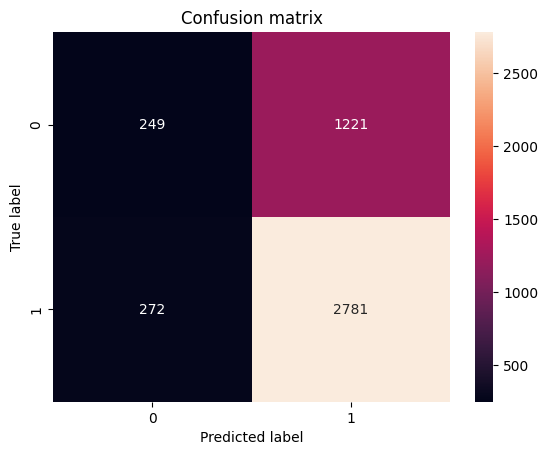

In [53]:
#xgboost on df [target]
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

#change target to binary
df['target'] = df['target'].replace(2,1)

#split data into X and y
X = df.drop(['target'], axis=1)
y = df['target']

#split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#instantiate model and train
model = XGBClassifier()
model.fit(X_train, y_train)

#make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#classification report
print(classification_report(y_test, y_pred))

#confusion matrix
print(confusion_matrix(y_test, y_pred))
#use seaborn to plot confusion matrix with labels
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
#labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()


In [52]:
#damage_ind, person_type_ind, first_crash_type_ind
#drop fields that contain damage_ind, person_type_ind, first_crash_type_ind
df = df.drop(df.filter(like='damage_ind').columns, axis=1)
df = df.drop(df.filter(like='person_type_ind').columns, axis=1)
df = df.drop(df.filter(like='first_crash_type_ind').columns, axis=1)

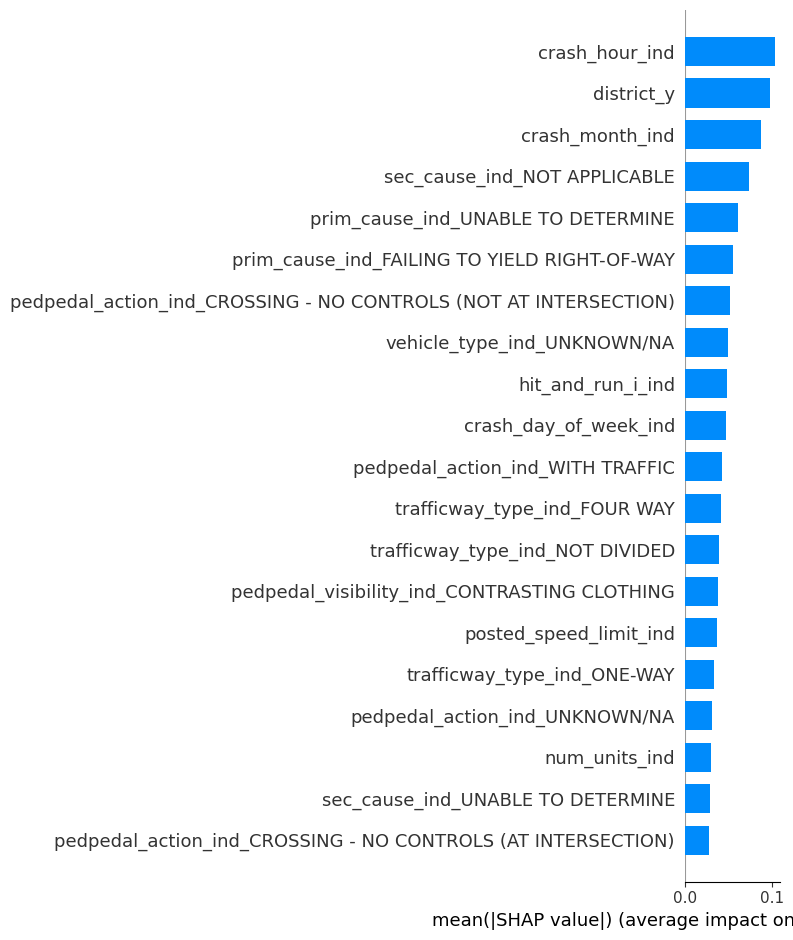

In [54]:
#shap values
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


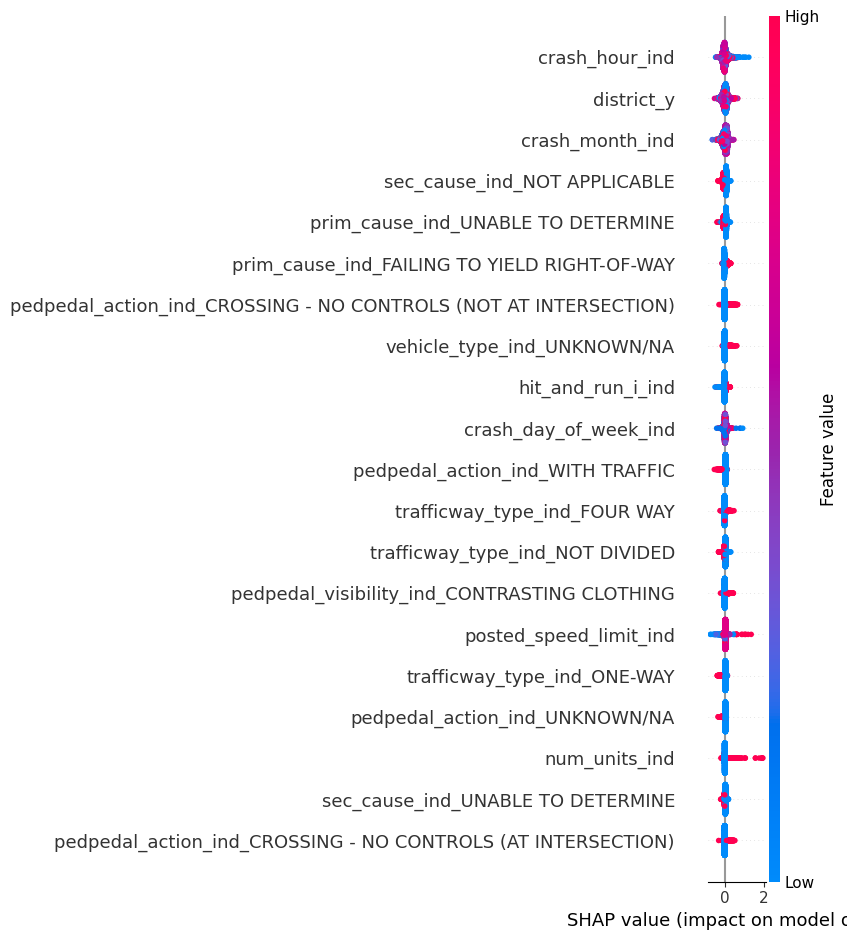

In [55]:
#shap plot
shap.summary_plot(shap_values, X_test)

Accuracy: 67.34%
              precision    recall  f1-score   support

           0       0.48      0.08      0.13      1470
           1       0.68      0.96      0.80      3053

    accuracy                           0.67      4523
   macro avg       0.58      0.52      0.47      4523
weighted avg       0.62      0.67      0.58      4523

[[ 113 1357]
 [ 120 2933]]


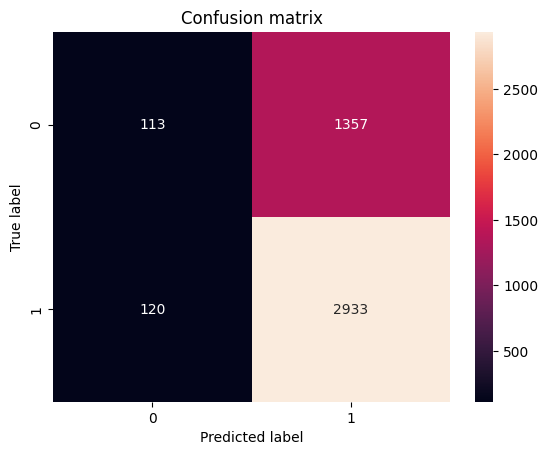

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


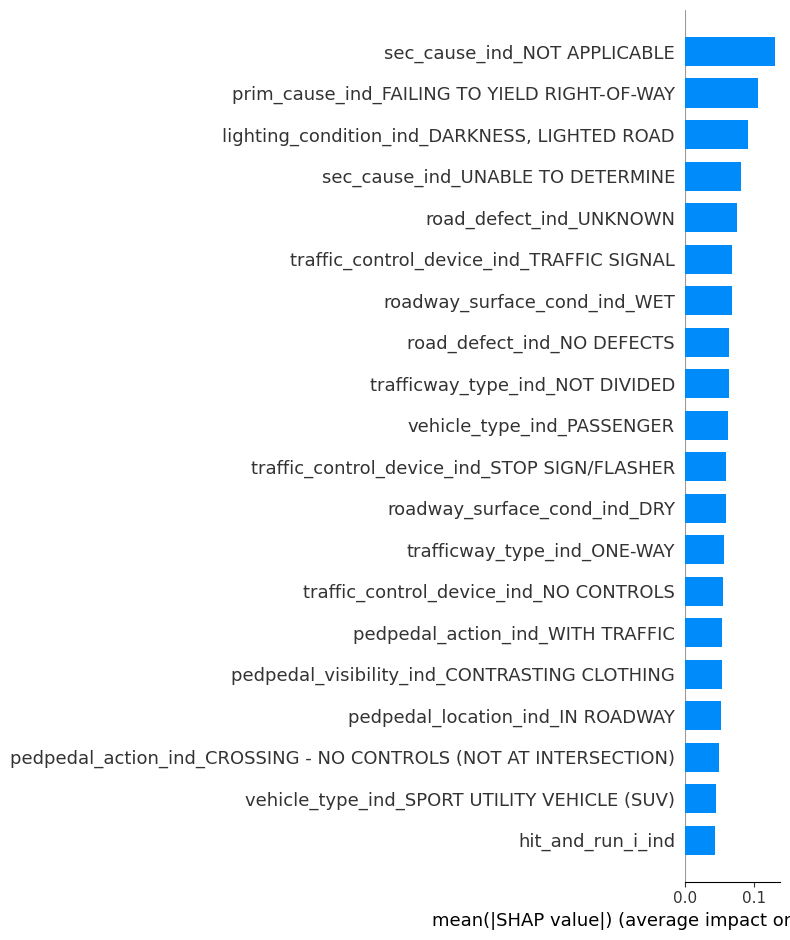

In [60]:
#logistic regression sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

#instantiate model and train
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

#make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#classification report
print(classification_report(y_test, y_pred))

#confusion matrix
print(confusion_matrix(y_test, y_pred))
#use seaborn to plot confusion matrix with labels
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
#labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

#logistic regression shap
import shap
shap.initjs()
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [62]:
#poisson regression to understand relationship between feature and event. each record is an event
import statsmodels.api as sm
from statsmodels.formula.api import poisson
from statsmodels.formula.api import ols

#instantiate model and train
model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
model = model.fit()
print(model.summary())

overflow encountered in exp


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                18090
Model:                            GLM   Df Residuals:                    17882
Model Family:                 Poisson   Df Model:                          207
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4374e+49
Date:                Mon, 26 Feb 2024   Deviance:                   2.8747e+49
Time:                        21:50:19   Pearson chi2:                 1.44e+49
No. Iterations:                   100   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

In [68]:
#Take each coefficient and exponentiate it to get the incidence rate ratio, order from highest to lowest. put in data frame
#exponentiate coefficients
#max row display
pd.set_option('display.max_rows', None)
irr = np.exp(model.params)
irr = irr.sort_values(ascending=False)
irr = pd.DataFrame(irr, columns=['incidence_rate_ratio'])
#add confidence intervals
irr['ci_lower'] = np.exp(model.conf_int()[0])
irr['ci_upper'] = np.exp(model.conf_int()[1])
#add p-values
irr['p_value'] = model.pvalues
#remove values with p-value > 0.05
irr = irr[irr['p_value'] < 0.05]
irr

,incidence_rate_ratio,ci_lower,ci_upper,p_value
traffic_control_device_ind_NO PASSING,2413.451992,2413.451992,2413.451992,0.0
sec_cause_ind_UNABLE TO DETERMINE,759.160232,759.160232,759.160232,0.0
hit_and_run_i_ind,757.335113,757.335113,757.335113,0.0
weather_condition_ind_UNKNOWN,308.159507,308.159507,308.159507,0.0
trafficway_type_ind_ONE-WAY,283.661277,283.661277,283.661277,0.0
road_defect_ind_UNKNOWN,262.833366,262.833366,262.833366,0.0
roadway_surface_cond_ind_UNKNOWN,213.113116,213.113116,213.113116,0.0
crash_day_of_week_ind,54.969770,54.969770,54.969770,0.0
trafficway_type_ind_DIVIDED - W/MEDIAN (NOT RAISED),33.954669,33.954669,33.954669,0.0
prim_cause_ind_FAILING TO YIELD RIGHT-OF-WAY,29.565437,29.565437,29.565437,0.0


In [15]:
input_cols = ['age_ind', 'district_y', 'crash_hour_ind', 'posted_speed_limit_ind', 'street_direction_ind_S', 'street_direction_ind_N',
 'lighting_condition_ind_DAYLIGHT','crash_day_of_week_ind', 'target']

df = df[input_cols]

In [74]:
# Split the data into X and y
X = df.drop(columns=['target']).to_numpy() 
y = df['target'].to_numpy() 

In [75]:
df['target'].value_counts()

target
1    11937
0     7411
2     3265
Name: count, dtype: int64

Naive Bayes can be extended to handle multi-class classification problems. In this context, it calculates the probability of each class given the features and selects the class with the highest probability as the predicted class.

Logistic Regression can be extended to handle multi-class classification tasks. One common approach is the one-vs-rest (OvR) strategy, where separate binary classifiers are trained for each class. Each classifier is trained to distinguish between one class and the rest. Alternatively, the one-vs-one (OvO) strategy trains a binary classifier for each pair of classes.

SVM: SVM can be adapted to handle multi-class classification using either the one-vs-one (OvO) or one-vs-rest (OvR) strategy. In OvO, a binary classifier is trained for each pair of classes, and the class with the most votes is chosen. In OvR, separate binary classifiers are trained for each class, where each classifier distinguishes between one class and the rest.

Random Forest: Ensemble learning method that combines the strengths of decision trees with randomization to achieve high predictive accuracy and generalization performance.

Gradient Boosting: Builds an ensemble of weak learners, optimizing them using gradient descent to minimize a loss function and achieve strong predictive performance.


In [76]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    nb_classifier = GaussianNB()

    # Perform cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(nb_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = naive_bayes_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.1753
Accuracy for class 1: 0.9079
Accuracy for class 2: 0.0021


In [79]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(lr_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = logistic_regression_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


/opt/anaconda3/envs/chicago/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/chicago/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Accuracy for class 0: 0.0734
Accuracy for class 1: 0.9778
Accuracy for class 2: 0.0000


/opt/anaconda3/envs/chicago/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.svm import SVC

def svm_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    svm_classifier = SVC()

    # cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(svm_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = svm_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.2154
Accuracy for class 1: 0.9261
Accuracy for class 2: 0.0000


In [81]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    rf_classifier = RandomForestClassifier()

    # cross-validation and get predicted labels for each sample
    y_pred = cross_val_predict(rf_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = random_forest_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.3330
Accuracy for class 1: 0.6923
Accuracy for class 2: 0.0833


In [82]:
from sklearn.ensemble import GradientBoostingClassifier

def gradient_boosting_accuracy_per_class(X, y, n_splits=5, n_repeats=2):
    gb_classifier = GradientBoostingClassifier()

    # cross-validation and predicted class for each sample
    y_pred = cross_val_predict(gb_classifier, X, y, cv=n_splits, n_jobs=-1)

    # accuracy for each class
    accuracy_per_class = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_accuracy = accuracy_score(y[class_indices], y_pred[class_indices])
        accuracy_per_class.append(class_accuracy)

    return accuracy_per_class

# Example:
accuracies = gradient_boosting_accuracy_per_class(X, y)
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")


Accuracy for class 0: 0.2086
Accuracy for class 1: 0.9332
Accuracy for class 2: 0.0089
